# DA_HW_3 Support Vector Machine and Decision Trees

# Due on 5/10 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel without specifying the C-parameter

In [4]:
df.corr().filter(items=['had_affair']).sort_values('had_affair', ascending=False)

,had_affair
had_affair,1.000000
yrs_married,0.203109
children,0.159833
age,0.146519
occ5,0.073766
occ3,0.045729
occ6,0.012559
occ2,-0.024613
educ,-0.075280
occ4,-0.082706


#### Let's use the top 4 attributes in terms of absolute correlation (negative correlation can be just as useful as poitive correlation)

In [36]:
# These variables will be used throughout this homework
X = df[['rate_marriage','yrs_married','children','age']].to_numpy()
Y = df['had_affair'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [7]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[838,  47],
       [297,  92]], dtype=int64)

In [39]:
print(classification_report(Y_test,Y_pred))
print(svc.score(X_test, Y_test))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       885
           1       0.24      0.07      0.11       389

    accuracy                           0.65      1274
   macro avg       0.46      0.49      0.45      1274
weighted avg       0.55      0.65      0.58      1274

0.7543171114599686
[[794  91]
 [360  29]]


In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.27001569858712715
Mean Squared Error: 0.27001569858712715
Root Mean Squared Error: 0.5196303480235995
R-squared: -0.2730193310385898


<AxesSubplot:xlabel='trial'>

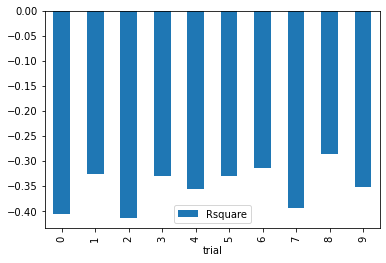

In [10]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC(kernel='linear')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

#### The model looks to be pretty good for determining did not have affair (0) with an f1 score of 0.81, but it isn't so good for determining did have an affair(1) with an f1 score of 0.25. The r squared is also very low which indicates that it isn't such great a model either. It does pass 10 fold cross validation so at least we know we have consistency. It's good at detecting when there isn't cheating, but really bad, worse than flipping a coin, of determining if someone cheated. This is not a good model for predicting if someone will cheat, but good at prediciting if someone won't/didn't cheat. But the r squrat is still really bad, so this is not a good model overall.

### Question 2. Now try different value of C-parameter and rerun your model

### Large C

In [11]:
svc = svm.SVC(kernel='linear', C=2**5)
svc.fit(X_train, Y_train)

SVC(C=32, kernel='linear')

In [12]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[810,  64],
       [307,  93]], dtype=int64)

In [38]:
print(classification_report(Y_test,Y_pred))
print(model.score(X_test, Y_test))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       885
           1       0.24      0.07      0.11       389

    accuracy                           0.65      1274
   macro avg       0.46      0.49      0.45      1274
weighted avg       0.55      0.65      0.58      1274

0.7370486656200942
[[794  91]
 [360  29]]


In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.29120879120879123
Mean Squared Error: 0.29120879120879123
Root Mean Squared Error: 0.539637648064691
R-squared: -0.3519851258581237


<AxesSubplot:xlabel='trial'>

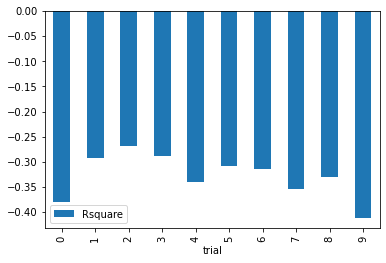

In [15]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

#### As before, the model looks to be pretty good for determining did not have affair with an f1 score of 0.82, but it isn't so good for determining did have an affair(1) with an f1 score of 0.35. The r squared is also very low which indicates that it isn't such great a model either. It does pass 10 fold cross validation so at least we know we have consistency. It's good at detecting when there isn't cheating, but really bad, worse than flipping a coin, of determining if someone cheated. This is not a good model for predicting if someone will cheat, but good at prediciting if someone won't/didn't cheat. But the r squrat is still really bad, so this is not a good model overall.¶The accuracy is pretty good overall, but the f1 scores indicate, it isn't so great overall (the really good 0 case makes it look okay. Important to look at details). I think raising the C parameter did not help since we are being more strict/higher penalty on the misclassifyings, but the data appears to be not clear cut (as opposed to the muffin case) and trying to find  a hyperplane in our data that is really accurate is going to be impossible/hard.

### Small C

In [16]:
svc = svm.SVC(kernel='linear', C=2**-5)
svc.fit(X_train, Y_train)

SVC(C=0.03125, kernel='linear')

In [17]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[796,  37],
       [345,  96]], dtype=int64)

In [37]:
print(classification_report(Y_test,Y_pred))
print(model.score(X_test, Y_test))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       885
           1       0.24      0.07      0.11       389

    accuracy                           0.65      1274
   macro avg       0.46      0.49      0.45      1274
weighted avg       0.55      0.65      0.58      1274

0.7370486656200942
[[794  91]
 [360  29]]


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.29984301412872844
Mean Squared Error: 0.29984301412872844
Root Mean Squared Error: 0.5475792309143294
R-squared: -0.32479658530078703


<AxesSubplot:xlabel='trial'>

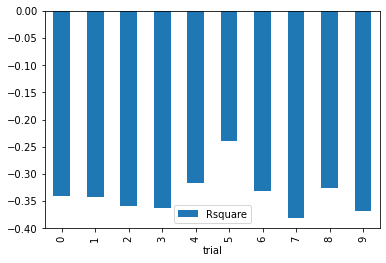

In [20]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

#### As before, the model looks to be pretty good for determining did not have affair with an f1 score of 0.81, but it isn't so good for determining did have an affair(1) with an f1 score of 0.33. The r squared is also very low which indicates that it isn't such great a model either, but it is better than with a large C. It does pass 10 fold cross validation so at least we know we have consistency. It's good at detecting when there isn't cheating, but really bad, worse than flipping a coin, of determining if someone cheated. This is not a good model for predicting if someone will cheat, but good at prediciting if someone won't/didn't cheat. But the r squrat is still really bad, so this is not a good model overall.¶The accuracy is pretty good overall, but the f1 scores indicate, it isn't so great overall (the really good 0 case makes it look okay. Important to look at details). I think lowering the C parameter did not help a little since we are being less strict/lower penaty for misclassifying, and the data appears to be not clear cut (as opposed to the muffin case) and trying to find  a hyperplane in our data that is really accurate is going to be impossible/hard. If we lax on the classifying rules, we at least might get better classification overall.

### Question 3. Now use rbf as your kernel along with different value for Gamma and C

In [21]:
gammas = [2**5, 2**-5]
c_s = [10, 100, 1000]

---------------------------------------
c: 10	gamma: 32

[[736 114]
 [285 139]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       850
           1       0.55      0.33      0.41       424

    accuracy                           0.69      1274
   macro avg       0.64      0.60      0.60      1274
weighted avg       0.66      0.69      0.66      1274

Mean Absolute Error: 0.3131868131868132
Mean Squared Error: 0.3131868131868132
Root Mean Squared Error: 0.5596309616048893
R-squared: -0.4104495005549387
---------------------------------------
c: 100	gamma: 32

[[759  99]
 [281 135]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       858
           1       0.58      0.32      0.42       416

    accuracy                           0.70      1274
   macro avg       0.65      0.60      0.61      1274
weighted avg       0.68      0.70      0.67      1274

Mean Absolute Error: 0.29827315

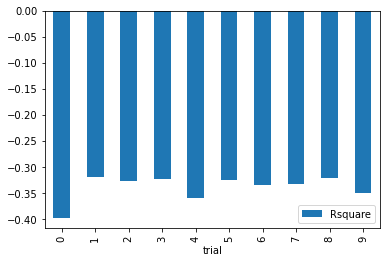

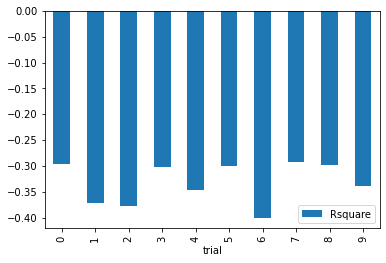

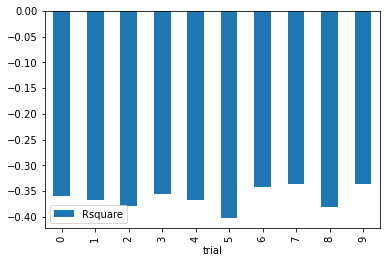

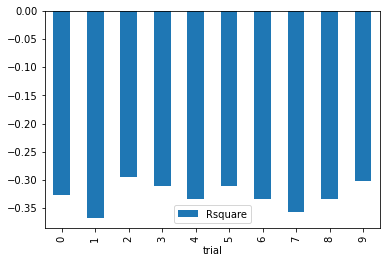

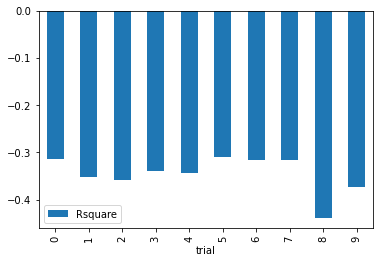

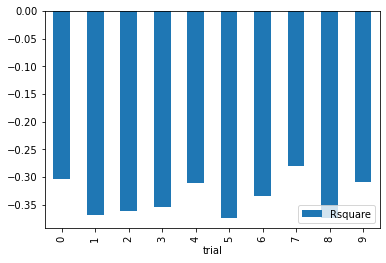

In [22]:
for g in gammas:
    for c in c_s:
        svc = svm.SVC(kernel='rbf', probability=True, C=c, gamma=g)
        svc.fit(X_train, Y_train)
        Y_pred = svc.predict(X_test)
        model.score(X_test, Y_test)
        print('---------------------------------------')
        print('c: ' + str(c) + '\t' + 'gamma: ' +str(g) + '\n')
        model.score(X_test, Y_test)
        print(confusion_matrix(Y_test, Y_pred))
        print(classification_report(Y_test,Y_pred))
        print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
        print('R-squared:', metrics.r2_score(Y_test, Y_pred))
        rsquare = []
        for i in range(10):
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
            model = svm.SVC()
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
        rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
        rdf.plot.bar(x='trial', y='Rsquare')

### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters? Comment on the effect of using different C and Gamma parameters

### From the data here it appears that the best choice for the kernel is Radial basis function kernel with c=1000 and gamma = 2**-5. Since the data is not clean cut (unlike the muffin data from lecture), assigning a high penalty can force a better hyperplane and not let the model settle on a 'good enough' hyperplane. The low gamma means that we have much larger radii for the groups resulting in more points being grouped together. The f1 score of .71 is pretty good. The f1 score for predicting no affair is much better at 0.79 but for when there is an affair it is much lower at .45 (one of the better f1 scores for had an affair amongst all of our models).
### In the model with a low C (10) and a high gamma (32), the model was about the same a linear model. The high gamma does mean that there is a lot of overfitting which is true of both the linear model and this model (rbf, c=10, gamma =32). The r squrared improves as the margin gets harder. This indicates that the model might be overfitting and can lead to invalid conclusions. All of the f1 scores are about the same interestingly enough. We also see that all of the r squared amongst our models are about the same (~-..3) indicating that there is a correlation amonst our data that should be worked upon.
### Something that should also be noted is the very high rate of false negatives. I am not a philosipher and will not discuss the impacts of false negatives, but I think it is worth mentioning that there might be a problem here and let the philophers decide if it is morally a problem or not. But when analyzing our model this must be taken into consideration.

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [24]:
predictions = model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[776  81]
 [296 121]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       857
           1       0.60      0.29      0.39       417

    accuracy                           0.70      1274
   macro avg       0.66      0.60      0.60      1274
weighted avg       0.68      0.70      0.67      1274

0.7040816326530612


[Text(118.70880643905694, 210.192, 'X[0] <= 3.5\ngini = 0.436\nsamples = 5092\nvalue = [3456, 1636]'),
 Text(39.594294928825626, 195.696, 'X[1] <= 4.25\ngini = 0.486\nsamples = 1152\nvalue = [481, 671]'),
 Text(9.48202846975089, 181.2, 'X[1] <= 1.5\ngini = 0.495\nsamples = 314\nvalue = [172, 142]'),
 Text(3.1772241992882564, 166.704, 'X[3] <= 29.5\ngini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(2.3829181494661924, 152.208, 'X[0] <= 2.5\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(1.5886120996441282, 137.712, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(3.1772241992882564, 137.712, 'X[3] <= 24.5\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(2.3829181494661924, 123.216, 'X[2] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(1.5886120996441282, 108.72, 'X[3] <= 19.75\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.7943060498220641, 94.22399999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(2.3829181494661924, 94.22399999999999, 'gin

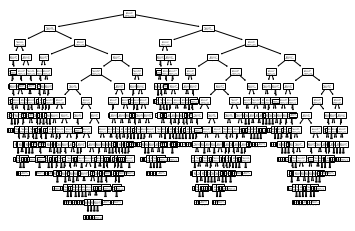

In [25]:
tree.plot_tree(model)

### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [26]:
X = df[['rate_marriage','yrs_married','children','age']].to_numpy()
Y = df['had_affair'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [27]:
criterias=['gini','entropy']
for d in range(2,5):
    for c in criterias:
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))
        #tree.plot_tree(model)

---------------------------------
depth: 2	criterion: gini

[[1192  111]
 [ 407  200]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1303
           1       0.64      0.33      0.44       607

    accuracy                           0.73      1910
   macro avg       0.69      0.62      0.63      1910
weighted avg       0.71      0.73      0.70      1910

0.7287958115183246
---------------------------------
depth: 2	criterion: entropy

[[1192  111]
 [ 407  200]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1303
           1       0.64      0.33      0.44       607

    accuracy                           0.73      1910
   macro avg       0.69      0.62      0.63      1910
weighted avg       0.71      0.73      0.70      1910

0.7287958115183246
---------------------------------
depth: 3	criterion: gini

[[1192  111]
 [ 407  200]]
              precision    recall  f1-score 

### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

### It appears that the deeper you go the less accurate the model should be since there are less data points at the bottom of the tree, as we see in our instacne (I saw that more when I went 10 levels deep, but left the code as requested). A difference between gini and entropy is htat gini is less accurate but more lightweight while entropy is more accurate but computationally heavier (speed vs. resource issue seen again). In my case levels 2 and 3 in depth have the same level of impurity, and have the same results while a depth of level 4 has a lower accuracy score, so there appears to be no reason to use it. Depths of level 2 and 3 are the same in my case, so I'd say the best choice of criterion and max_depth would be 2 and gini since this is the least computationally heavy option while still maintaining the ideal results. Also, a depth of 2 is less likely to overfit the data than a max depth of 3. Overfitting is a major issue and if we can avoid it we should.

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your answer and code here

In [28]:
# Hint 
model1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model1.fit(X_train, Y_train)
model2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model2.fit(X_train, Y_train)
model3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model3.fit(X_train, Y_train)
# Then display all 3 trees

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 181.2, 'X[0] <= 3.5\ngini = 0.438\nsamples = 4456\nvalue = [3010, 1446]'),
 Text(83.7, 108.72, 'X[1] <= 4.25\ngini = 0.485\nsamples = 1006\nvalue = [417, 589]'),
 Text(41.85, 36.23999999999998, 'gini = 0.498\nsamples = 264\nvalue = [141, 123]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.467\nsamples = 742\nvalue = [276, 466]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 4.25\ngini = 0.373\nsamples = 3450\nvalue = [2593, 857]'),
 Text(209.25, 36.23999999999998, 'gini = 0.246\nsamples = 1394\nvalue = [1194, 200]'),
 Text(292.95, 36.23999999999998, 'gini = 0.435\nsamples = 2056\nvalue = [1399, 657]')]

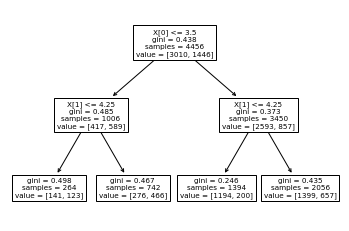

In [29]:
tree.plot_tree(model1)

[Text(167.4, 190.26, 'X[0] <= 3.5\ngini = 0.438\nsamples = 4456\nvalue = [3010, 1446]'),
 Text(83.7, 135.9, 'X[1] <= 4.25\ngini = 0.485\nsamples = 1006\nvalue = [417, 589]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.498\nsamples = 264\nvalue = [141, 123]'),
 Text(20.925, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.499\nsamples = 248\nvalue = [128, 120]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 2.5\ngini = 0.467\nsamples = 742\nvalue = [276, 466]'),
 Text(104.625, 27.180000000000007, 'gini = 0.424\nsamples = 236\nvalue = [72, 164]'),
 Text(146.475, 27.180000000000007, 'gini = 0.481\nsamples = 506\nvalue = [204, 302]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 4.25\ngini = 0.373\nsamples = 3450\nvalue = [2593, 857]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.246\nsamples = 1394\nvalue = [1194, 200]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.071\nsam

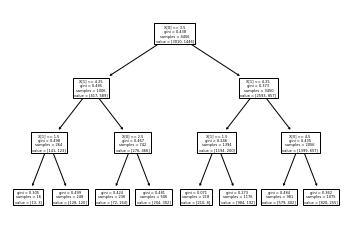

In [30]:
tree.plot_tree(model2)

[Text(167.4, 195.696, 'X[0] <= 3.5\ngini = 0.438\nsamples = 4456\nvalue = [3010, 1446]'),
 Text(83.7, 152.208, 'X[1] <= 4.25\ngini = 0.485\nsamples = 1006\nvalue = [417, 589]'),
 Text(41.85, 108.72, 'X[1] <= 1.5\ngini = 0.498\nsamples = 264\nvalue = [141, 123]'),
 Text(20.925, 65.232, 'X[0] <= 2.5\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(10.4625, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(31.387500000000003, 21.744, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(62.775000000000006, 65.232, 'X[3] <= 29.5\ngini = 0.499\nsamples = 248\nvalue = [128, 120]'),
 Text(52.3125, 21.744, 'gini = 0.5\nsamples = 236\nvalue = [118, 118]'),
 Text(73.2375, 21.744, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(125.55000000000001, 108.72, 'X[0] <= 2.5\ngini = 0.467\nsamples = 742\nvalue = [276, 466]'),
 Text(104.625, 65.232, 'X[2] <= 4.75\ngini = 0.424\nsamples = 236\nvalue = [72, 164]'),
 Text(94.16250000000001, 21.744, 'gini = 0.409\nsamples = 216\nvalue = [62

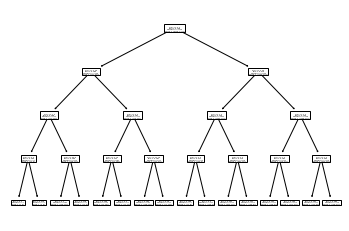

In [31]:
tree.plot_tree(model3)

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

Type your answer and code here

In [32]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred))
print(accuracy_score(Y_test, rfc_pred))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1303
           1       0.58      0.42      0.48       607

    accuracy                           0.72      1910
   macro avg       0.67      0.64      0.64      1910
weighted avg       0.70      0.72      0.70      1910

0.7172774869109948
[[1192  111]
 [ 412  195]]


### The accuracy is about the same as the decision trees modeled here. However, if we look at the f1 score for predicting had_affair, it the highest seen for all the models. I would therefore say this is the best model we have since we can 'trust' this model the most since it isn't so heavily weighted to having good no-had-affair ofsetting the bad had-affair. Still suffers from having a much better prediction of had no affair as opposed to having affair. We still have the issue of 